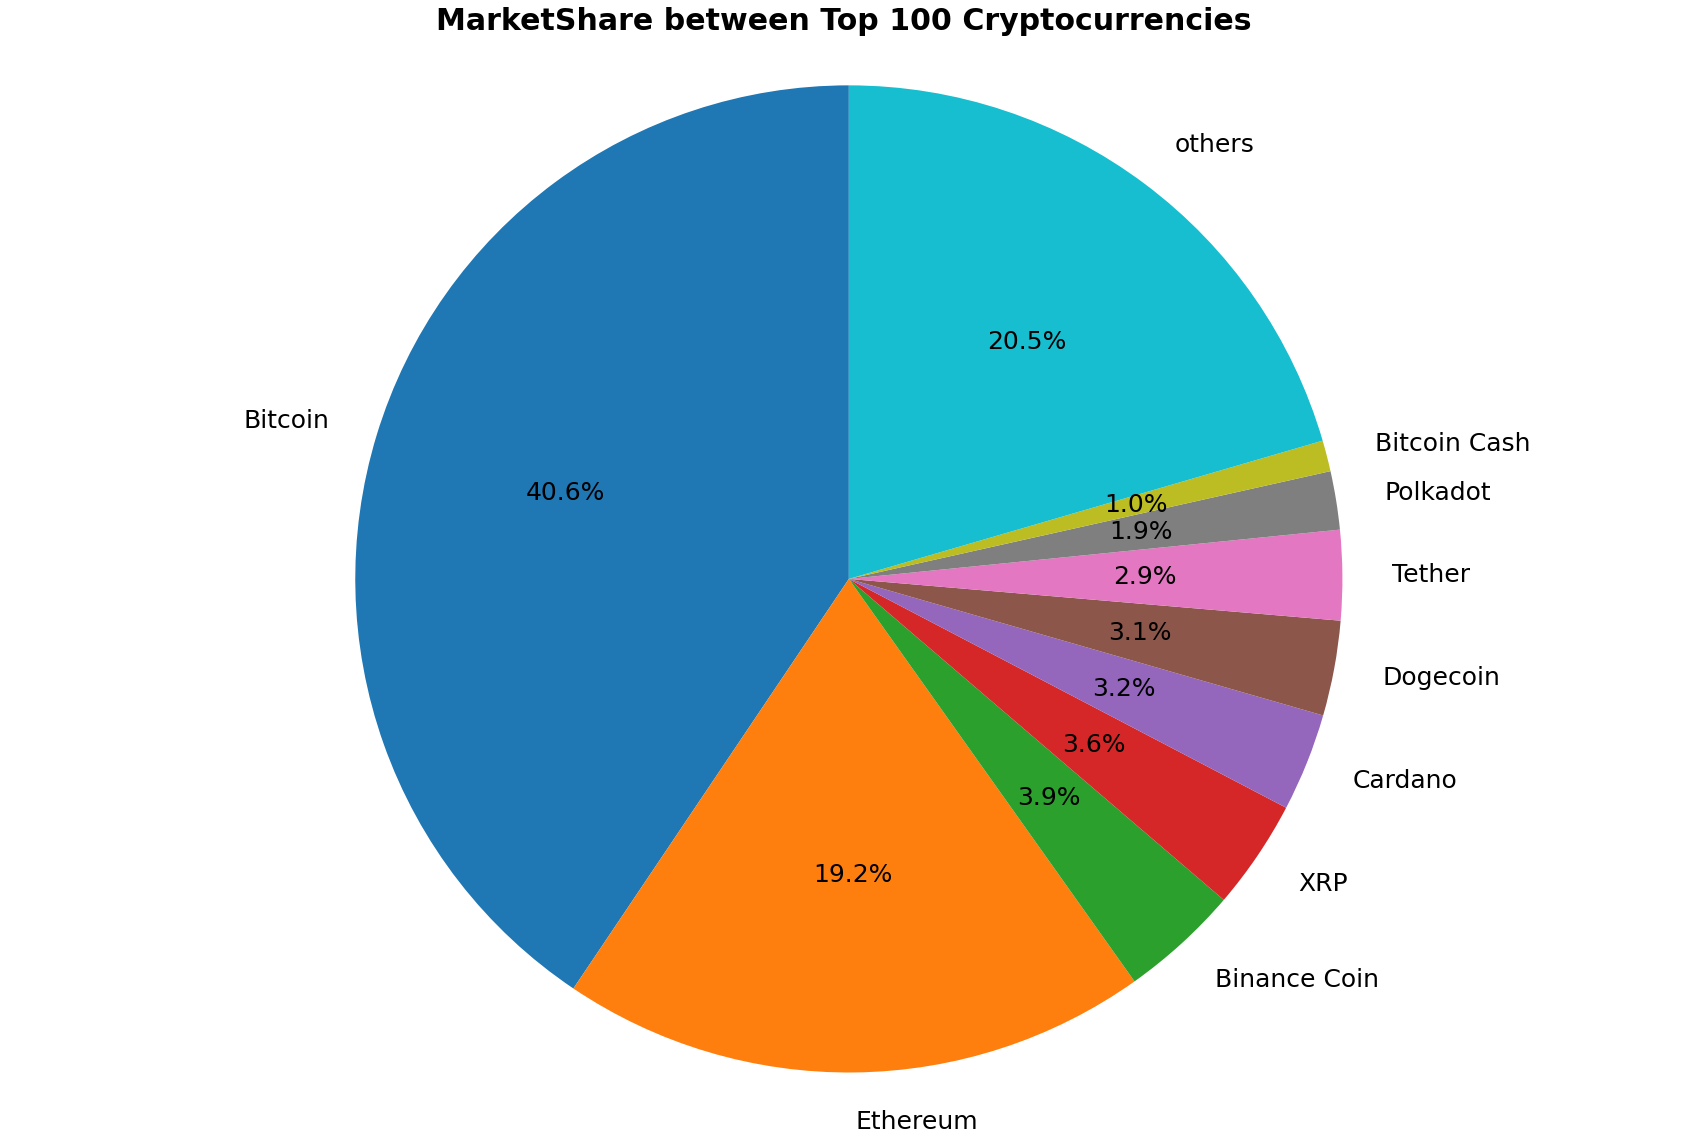

,name,current_price,market_cap,total_volume
0,Bitcoin,43032.000000,805791826183,6.892122e+10
1,Ethereum,3297.350000,382227915400,6.450716e+10
2,Binance Coin,501.210000,77586298440,3.948279e+09
3,XRP,1.540000,71390580527,1.363193e+10
4,Cardano,1.990000,63779344180,9.108181e+09
5,Dogecoin,0.476418,61798222046,6.054897e+09
6,Tether,1.000000,58424278077,1.718424e+11
7,Polkadot,38.100000,37945818594,2.786289e+09
8,Bitcoin Cash,1074.490000,20173750283,7.194723e+09
9,others,NaN,406707032970,NaN


In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from pylab import rcParams


#list of cryptocurrency pairs
url = 'https://api.coingecko.com/api/v3/coins/markets?vs_currency=usd&order=market_cap_desc&page=1&sparkline=false'
data = requests.get(url).json()
df = pd.DataFrame.from_dict(data)

#Remoção de colunas inúteis para o trabalho
df.drop(columns=["image", 
                 "market_cap_rank", 
                 "fully_diluted_valuation", 
                 "high_24h", 
                 "low_24h", 
                 "price_change_24h", 
                 "price_change_percentage_24h", 
                 "market_cap_change_24h", 
                 "market_cap_change_percentage_24h", 
                 "circulating_supply", 
                 "total_supply", 
                 "max_supply", 
                 "ath", 
                 "roi",
                 "ath_change_percentage",
                 "ath_date", 
                 "last_updated", 
                 "atl", 
                 "atl_change_percentage", 
                 "id",
                 "symbol",
                 "atl_date"], 
        inplace=True)

df_marketshare250 = df.tail(91)
others = df_marketshare250["market_cap"].sum()
df = df.head(9)
new_row = {"name":"others", 
           "market_cap":others}
df = df.append(new_row, ignore_index=True)

SumData = df["market_cap"].tolist()
Labels = df["name"].tolist()

plt.pie(SumData,
        labels=Labels,
        startangle=90,
        autopct='%1.1f%%') #Apresenta as percentagens das fatias

plt.axis('equal')
rcParams['font.size'] = 25
rcParams['figure.figsize'] = 30, 20
plt.title("MarketShare between Top 100 Cryptocurrencies", font = {'family' : 'sans-serif',
                                                                 'weight' : 'bold',
                                                                 'size'   : 30})
#plt.legend(loc="lower right")
plt.show()
df